In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Generate synthetic network traffic data
np.random.seed(42)

# Normal traffic data (e.g., 1000 samples)
normal_traffic = np.random.normal(loc=0, scale=1, size=(1000, 2))

# Anomalous traffic data (e.g., 50 samples)
anomalous_traffic = np.random.uniform(low=-6, high=6, size=(50, 2))

# Combine the datasets
X = np.vstack((normal_traffic, anomalous_traffic))
y = np.array([1] * 1000 + [-1] * 50)  # 1 for normal, -1 for anomaly

In [7]:
# Create an Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
model.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [9]:
# Predict anomalies
predictions = model.predict(X)

# Convert predictions to binary labels (1 for normal, -1 for anomaly)
predictions = np.where(predictions == -1, -1, 1)

In [11]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y, predictions))

print("\nClassification Report:")
print(classification_report(y, predictions))

Confusion Matrix:
[[ 40  10]
 [ 13 987]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.80      0.78        50
           1       0.99      0.99      0.99      1000

    accuracy                           0.98      1050
   macro avg       0.87      0.89      0.88      1050
weighted avg       0.98      0.98      0.98      1050



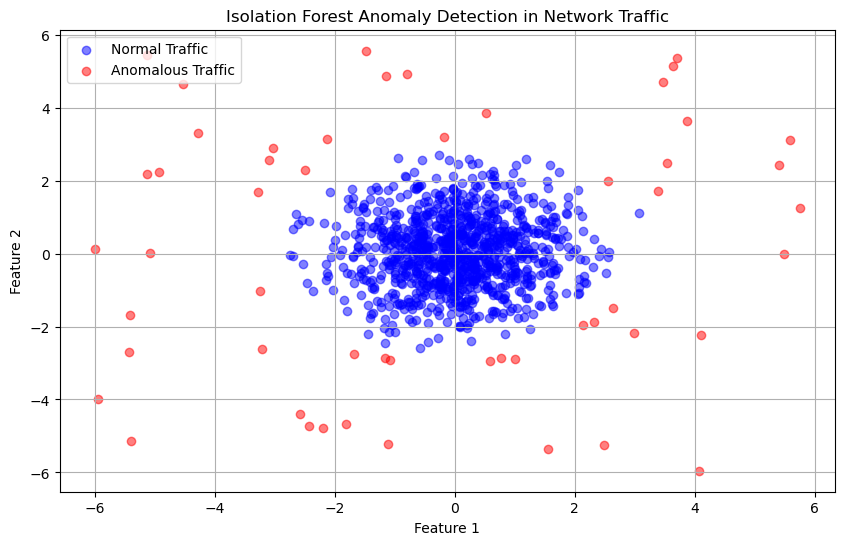

In [13]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X[predictions == 1][:, 0], X[predictions == 1][:, 1], label='Normal Traffic', color='blue', alpha=0.5)
plt.scatter(X[predictions == -1][:, 0], X[predictions == -1][:, 1], label='Anomalous Traffic', color='red', alpha=0.5)
plt.title('Isolation Forest Anomaly Detection in Network Traffic')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()